<a href="https://colab.research.google.com/github/shahjan49/CODSOFT/blob/main/CODSOFT_task_3_Classification_of_IRIS_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

Load data and show first 10 rows of data.

In [3]:
data=pd.read_csv("C:/Users/Harsha/Desktop/codesoft/archive (3)/IRIS.csv")
data.head(10)

,sno,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Calculates statistical values and rounds them to 3 decimal places.

In [4]:
data.describe().round(3)

,sno,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000,150.000
mean,75.500,5.843,3.054,3.759,1.199
std,43.445,0.828,0.434,1.764,0.763
min,1.000,4.300,2.000,1.000,0.100
25%,38.250,5.100,2.800,1.600,0.300
50%,75.500,5.800,3.000,4.350,1.300
75%,112.750,6.400,3.300,5.100,1.800
max,150.000,7.900,4.400,6.900,2.500


Mark null values as True and returns sum of number of True values in each column.

In [5]:
data.isnull().sum()

sno             0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Extracting all information about data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sno           150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Shape of data

In [7]:
data.shape

(150, 6)

Checking Unique values of species column.

In [8]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Change the catagorical data into numerical data by using OneHotEncoding.

In [9]:
data['species']=data['species'].apply({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}.get)
data.head()

,sno,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Deviding the data into Dependent and Independent variables.

In [10]:
x=data.drop(['species'],axis=1)
y=data['species']
x.head()

,sno,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

Deviding the cleaned data into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

Creating first machine learning model 'Logistic Regression'.

In [13]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

Train the model.

In [14]:
log.fit(x_train,y_train)

c:\Users\Harsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Make predictions on model

In [15]:
predictions=log.predict(x_test)
print(predictions)

[0 2 2 2 0 2 0 0 1 2 0 2 1 2 1 2 2 1 1 0 1 1 1 1 2 1 2 2 2 2]


Check confusion metrics and accuracy score.

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [17]:
print(cm)

[[ 6  0  0]
 [ 0 10  0]
 [ 0  0 14]]


In [18]:
print(ac)

1.0


Creating second machine learning model 'Random Forest'.

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

Train the model.

In [20]:
forest.fit(x_train,y_train)

RandomForestClassifier()

Make predictions on model.

In [21]:
predictions=forest.predict(x_test)
print(predictions)

[0 2 1 2 0 2 0 0 1 2 0 2 1 2 1 2 2 1 1 0 1 1 1 1 2 1 2 2 2 2]


Check cofusion metrics and accuracy score.

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [23]:
print(cm)

[[ 6  0  0]
 [ 0 10  0]
 [ 0  1 13]]


In [24]:
print(ac)

0.9666666666666667


Creating third machine learning model.

In [25]:
from sklearn.svm import SVC
svm=SVC()

Train the model.

In [26]:
svm.fit(x_train,y_train)

SVC()

Make predictions on model.

In [27]:
predictions=svm.predict(x_test)
print(predictions)

[0 2 2 2 0 2 0 0 1 2 0 2 1 2 1 2 2 1 1 0 1 1 1 0 2 1 2 2 2 2]


Check confusion metrics ad accuracy score.

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [29]:
print(cm)

[[ 6  0  0]
 [ 1  9  0]
 [ 0  0 14]]


In [30]:
print(ac)

0.9666666666666667


In [31]:
print(data.columns)


Index(['sno', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


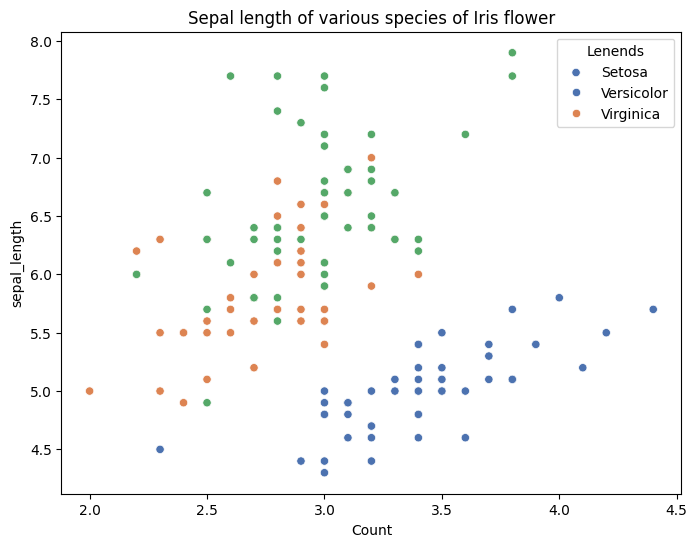

In [32]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='sepal_width', y='sepal_length', hue='species', palette='deep', data=data)
plt.xlabel('Count')
plt.title('Sepal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()

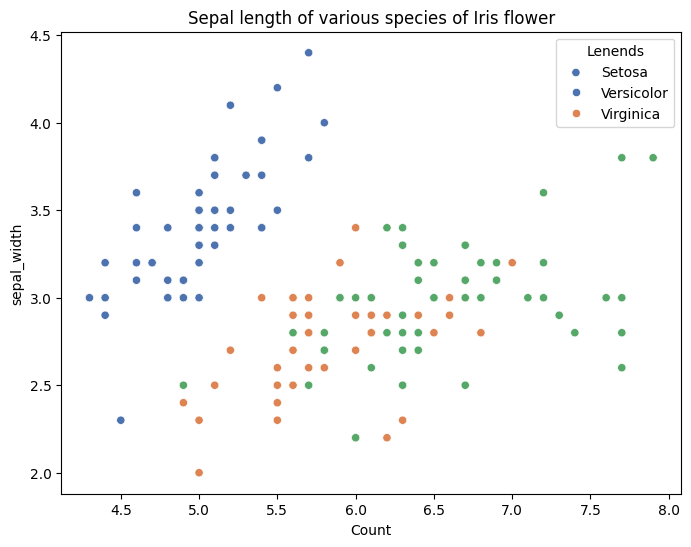

In [33]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='sepal_length', y='sepal_width', hue='species', palette='deep', data=data)
plt.xlabel('Count')
plt.title('Sepal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()

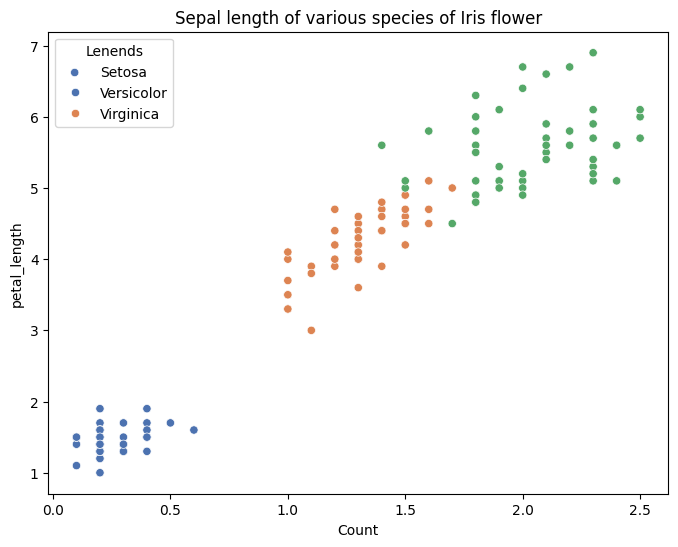

In [34]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='petal_width', y='petal_length', hue='species', palette='deep', data=data)
plt.xlabel('Count')
plt.title('Sepal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()

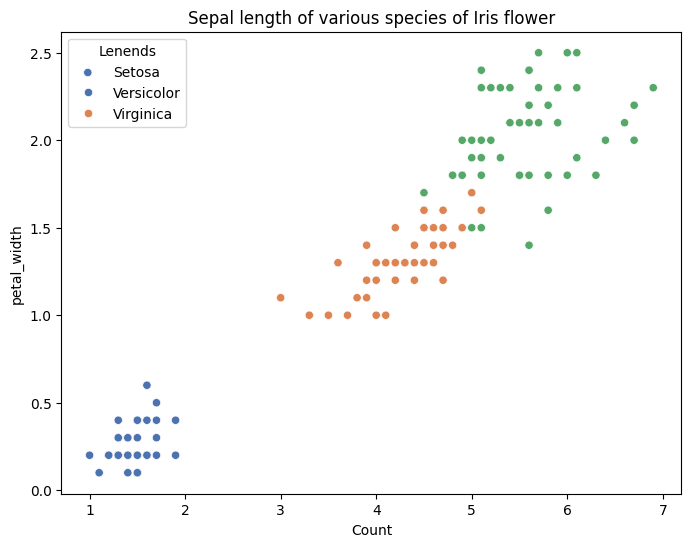

In [35]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='petal_length', y='petal_width', hue='species', palette='deep', data=data)
plt.xlabel('Count')
plt.title('Sepal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()